In [52]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2109 non-null   object
 1   Sentiment  2109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


In [54]:
# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1010   1008                   Traffic open at shahrah e faisal    2
1          1099   1079  Road is closed for traffic at star gate toward...    3

In [55]:
# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

{'C': 1}
The accuracy of the model is: 0.937799043062201


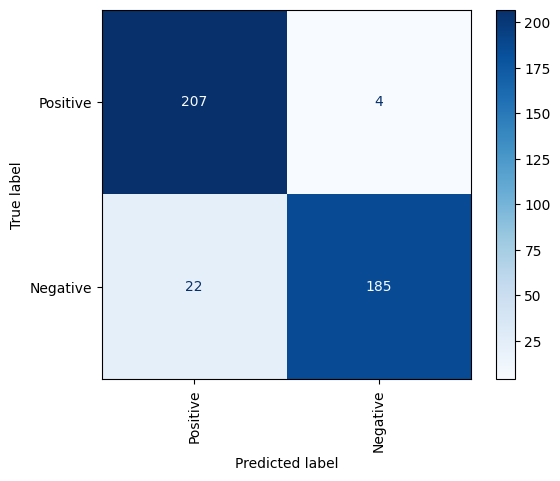

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV


#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

#(2) #HashingVectorizer
#vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
"""
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )
"""
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
#(1)LR

model = LogisticRegression(max_iter=1000, random_state=0)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

#(2)KNN
"""
model=KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
"""
#(3)RF
"""
model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
"""
#(4)XGBoost
"""
model =  XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
"""

#(5)SVM
"""
model= SVC(probability=True)
param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}
"""

#(6)Naïve Bayes models
"""
model=BernoulliNB()
param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}
"""

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train_vectorized, y_train)

best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

model = grid_search.best_estimator_

#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

count, SVM: 207,4|14,193 0.9569377990430622

hashing, SVM: 208,3|9,198 0.9712918660287081 {'C': 10, 'kernel': 'rbf'}

Tfidf, SVM: 205,6|11,196 0.9593301435406698

-----------------------------------------------

count, LR: 207,4|22,185 0.937799043062201

hashing, LR: 205,6|14,193 0.9521531100478469

tfidf, LR: 206,5|14,193 0.9545454545454546

-----------------------------------------------

count, KNN: 207,4|18,189 0.9473684210526315

hashing, KNN: 203,8|11,196 0.9545454545454546

tfidf, KNN: 200,11|17,190 0.9330143540669856


-----------------------------------------------
count, RF: 207,4|11,196 0.9641148325358851

hashing, RF: 206,5|7,200 0.9712918660287081 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


tfidf, RF: 208,3|9,198 0.9712918660287081 {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

-----------------------------------------------
count, xgb: 207,4|13,194 0.9593301435406698

hashing, xgb: 210,1|11,196 0.9712918660287081 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}

tfidf, xgb: 207,4|8,199 0.9712918660287081 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


-----------------------------------------------

count, NB: 205,6|18,189 0.9425837320574163

hashing, NB: 181,30|39,168 0.8349282296650717

tfidf, NB: 204,7|18,189 0.9401913875598086